$$
\def\com#1{\color{blue}{\textrm{#1}}}
\def\coms#1{\color{blue}{#1}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>
$\com{Comments from the marker will appear like this. (Please use this notebook to complete your lab).}$

# Laboratory 5

In this lab we will study the properties of the simple dynamical system known as the Logistic map. We are concerned with the bahavior of the map

$$x_{n+1}=rx_n(1-x_n)$$

after many iterations, i.e. $n\gg 1$, as a function of $r$, with $0<r<4$. The initial conditions are not so important, provided $x_0\in (0,1)$. The long-time behavior tells us about whether the orbit reaches a simple stataionary solution, a periodic limit cycle, or never settles down to any regular orbit. 

Use the code provided in lectures as your starting point, and state your results to 3 significant figures. You are encouraged find answers graphically by zooming into regions of the logistic map and reading off the answers (automating these tasks is more difficult!). 

1. Verify numerically that the point where period-4 becomes stable is at $r\approx r_4\equiv 1+\sqrt{6}$.
1. Locate the value of $r$ where the period-doubling cascade terminates and the orbits become chaotic.
1. Examine the region where period-3 emerges, $r_3=1+\sqrt{8}$. Explain the process whereby the motion once again becomes chaotic as $r$ increases. 
1. Evaluate the Lyapunov exponent $\sigma$ (Lecture 10) for the last 100 values $x_n$ of a 600 iterate sequence. Plot $\sigma(r)$ for $0<r<4$, and compare $\sigma$ with the regions of regular and chaotic motion. What can you conclude?

# QUESTION 1

In [7]:
#Question 1.
#Attempting to verify "numerically" that after n iterations the n+4th iteration of logmap gives the nth value
using Base.Test
using Formatting

x1 = 0; x2 = 1; Nx = 100;
x0 = 0.7

r_4 = 1.0 + sqrt(6)
r_4_small = r_4 - 0.03

f(x,r) = r*x*(1-x)

#using some large n so that it has settled down... in this example 10000
n = 10000
x = zeros(n+10);
function logmap(x0,r,iter)
    x[1] = x0
    for n=2:iter
        x[n] = f(x[n-1],r)
    end
    return x[iter]
end

println("Showing it converges to period 4 numerically for r_4")
for i=n:n+8
    printfmt("the {}th iteration is {}\n",i,logmap(x0,r_4,i))
end

println("As we can see we are getting a repeating sequence of four values.")
println("Now testing numerically;\n")

@testset "Period 4 convergence tests for r_4" begin
    #testing that n = n+4, n+1 = n+5 ect
    @test logmap(x0,r_4,n)  ≈ logmap(x0,r_4,n+4) atol=0.0001;
    @test logmap(x0,r_4,n+1) ≈ logmap(x0,r_4,n+5) atol=0.0001;
    @test logmap(x0,r_4,n+2) ≈ logmap(x0,r_4,n+6) atol=0.0001;
    @test logmap(x0,r_4,n+3) ≈ logmap(x0,r_4,n+7) atol=0.0001;
    #now testing to make sure it isn't period 1,2
    @test false == isapprox(logmap(x0,r_4,n),logmap(x0,r_4,n+1),atol=0.0001)
    @test false == isapprox(logmap(x0,r_4,n),logmap(x0,r_4,n+2),atol=0.0001)
end

println("\nNow showing it does not converges to period 4 numerically for r_4 - ϵ")

for i=n:n+8
    printfmt("the {}th iteration is {}\n",i,logmap(x0,r_4_small,i))
end

println("As we can see the sytem is in the period two cycle for a smaller r. We will show this graphically later.")
println("Now testing numerically;\n")

@testset "Period 4 convergence tests for r_4_small" begin
    #testing that n = n+4, n+1 = n+5 ect
    @test logmap(x0,r_4_small,n)  ≈ logmap(x0,r_4_small,n+4) atol=0.0001;
    @test logmap(x0,r_4_small,n+1) ≈ logmap(x0,r_4_small,n+5) atol=0.0001;
    @test logmap(x0,r_4_small,n+2) ≈ logmap(x0,r_4_small,n+6) atol=0.0001;
    @test logmap(x0,r_4_small,n+3) ≈ logmap(x0,r_4_small,n+7) atol=0.0001;
    #now testing to make sure it isn't period 1,2
    @test false == isapprox(logmap(x0,r_4_small,n),logmap(x0,r_4_small,n+1),atol=0.0001)
    @test false == isapprox(logmap(x0,r_4_small,n),logmap(x0,r_4_small,n+2),atol=0.0001)
end

INFO: Precompiling module Formatting.


Showing it converges to period 4 numerically for r_4
the 10000th iteration is 0.8494394921753097
the 10001th iteration is 0.4411622846764512
the 10002th iteration is 0.8504307273748796
the 10003th iteration is 0.4387692494714665
the 10004th iteration is 0.8494395921591144
the 10005th iteration is 0.4411620436378712
the 10006th iteration is 0.8504306295322527
the 10007th iteration is 0.43876948601717713
the 10008th iteration is 0.849439692082853
As we can see we are getting a repeating sequence of four values.
Now testing numerically;

Test Summary:                      | Pass  Total
Period 4 convergence tests for r_4 |    6      6

Now showing it does not converges to period 4 numerically for r_4 - ϵ
the 10000th iteration is 0.8453133924660234
the 10001th iteration is 0.4471279000135039
the 10002th iteration is 0.845313392466023
the 10003th iteration is 0.44712790001350494
the 10004th iteration is 0.8453133924660234
the 10005th iteration is 0.4471279000135039
the 10006th iteration is 0

LoadError: [91mSome tests did not pass: 5 passed, 1 failed, 0 errored, 0 broken.[39m

As we can see in the output below for large n and r = r_4 the system is four periodic. If I instead set $r = r_4 - \epsilon$ we can see that the system is no longer period 4. It is now period two. So I have shown that when $r \approx r4$ the system period doubles from period two to period four.

A nice way to confirm our results here is show it graphically. I can simply plot the system around $r \approx r_4$ and what we see is the system period doubling from period two to period four.

$\com{Nice problem solving.}$

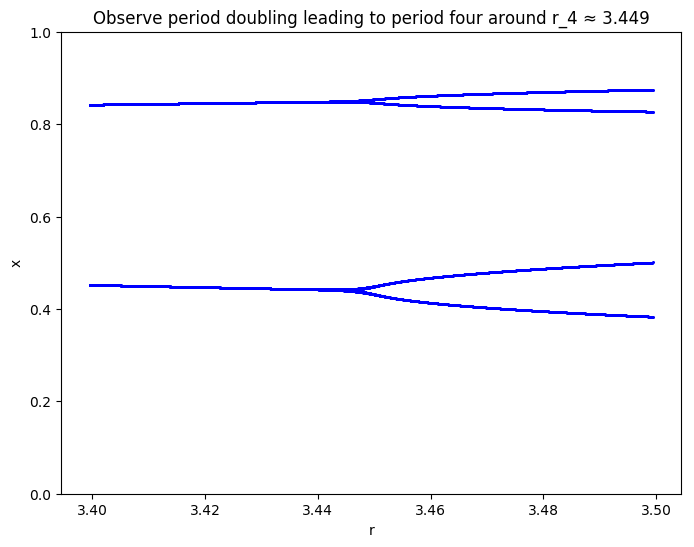

PyObject <matplotlib.text.Text object at 0x7f44815a5668>

In [2]:
#Question 1.. zooming in on area of interest
using PyPlot

f(x,r) = r*x*(1-x)
function logzoom(r1,r2)
    Nr = 4000
    R = linspace(r1,r2,Nr) |> collect
    Nn = 300

    #iterate
    X = zeros(Nr,Nn)
    X[:,1] = .5*ones(Nr)
    for n in 2:Nn, (j,r) in enumerate(R)
        X[j,n] = f(X[j,n-1],r)
    end
    return X
end

Nr = 4000
r1=1.0 + sqrt(6) - 0.05
r2=1.0 + sqrt(6) + 0.05
R = linspace(r1,r2,Nr) |> collect
X=logzoom(r1,r2)
Xplot=X[:,end-100:end]
f1=figure(figsize=(8,6))
plot(R,Xplot,"bo",ms=.06);
ylim(0,1)
xlabel("r")
ylabel("x")
title("Observe period doubling leading to period four around r_4 ≈ 3.449")

# QUESTION 2

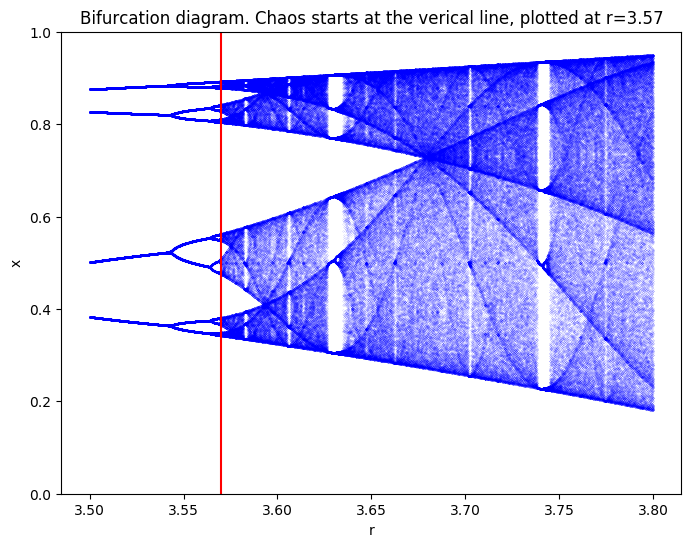

PyObject <matplotlib.text.Text object at 0x7f4481326940>

In [3]:
#Question 2.. zooming in on area of interest
using PyPlot
f(x,r) = r*x*(1-x)

function logzoom(r1,r2)
    Nr = 4000
    R = linspace(r1,r2,Nr) |> collect
    Nn = 300

    #iterate
    X = zeros(Nr,Nn)
    X[:,1] = .5*ones(Nr)
    for n in 2:Nn, (j,r) in enumerate(R)
        X[j,n] = f(X[j,n-1],r)
    end
    return X
end

Nr = 4000
r1=3.5
r2=3.8
R = linspace(r1,r2,Nr) |> collect
X=logzoom(r1,r2)
Xplot=X[:,end-100:end]
f1=figure(figsize=(8,6))
plot(R,Xplot,"bo",ms=.06);
axvline(x=3.57,c="r")
ylim(0,1)
xlabel("r")
ylabel("x")
title("Bifurcation diagram. Chaos starts at the verical line, plotted at r=3.57")

Zooming in on the spot were bifurcation first occurs, it is apparant that chaos starts at roughly r=3.57.

# QUESTION 3

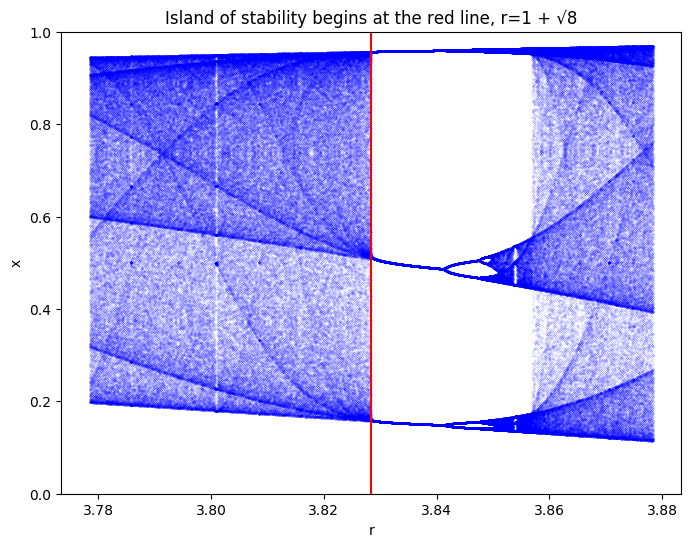

PyObject <matplotlib.text.Text object at 0x7f44807dfc18>

In [4]:
#Question 3.. zooming in on area of interest
using PyPlot

function logzoom(r1,r2)
    Nr = 4000
    R = linspace(r1,r2,Nr) |> collect
    Nn = 300

    #iterate
    X = zeros(Nr,Nn)
    X[:,1] = .5*ones(Nr)
    for n in 2:Nn, (j,r) in enumerate(R)
        X[j,n] = f(X[j,n-1],r)
    end
    return X
end

Nr = 4000
r1=1 + sqrt(8) - 0.05
r2=1 + sqrt(8) + 0.05
R = linspace(r1,r2,Nr) |> collect
X=logzoom(r1,r2)
Xplot=X[:,end-100:end]
f1=figure(figsize=(8,6))
plot(R,Xplot,"bo",ms=.06);
axvline(x=1 + sqrt(8),c="r")
ylim(0,1)
xlabel("r")
ylabel("x")
title("Island of stability begins at the red line, r=1 + √8")

I zoomed in on the given r value and saw that for a small period of time the solution is once again period 3 and stable... this is called an "island of stability".

However through a period doubling cascade it once again becomes chaotic quite rapidly.

$\com{Good.}$

# QUESTION 4

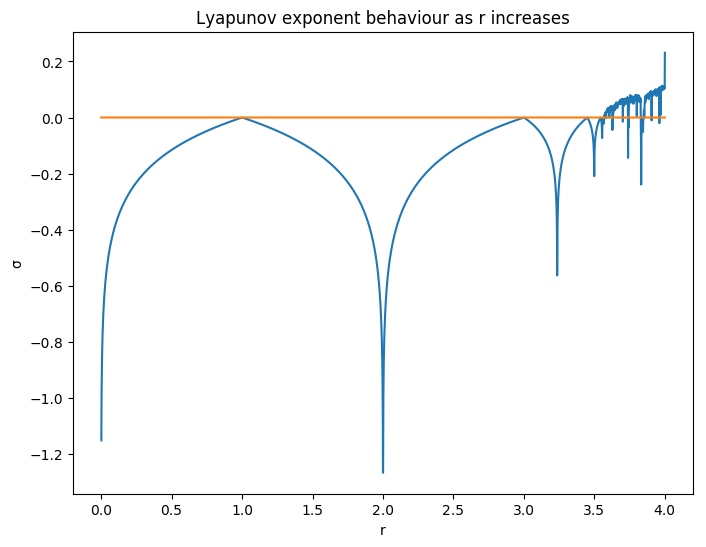

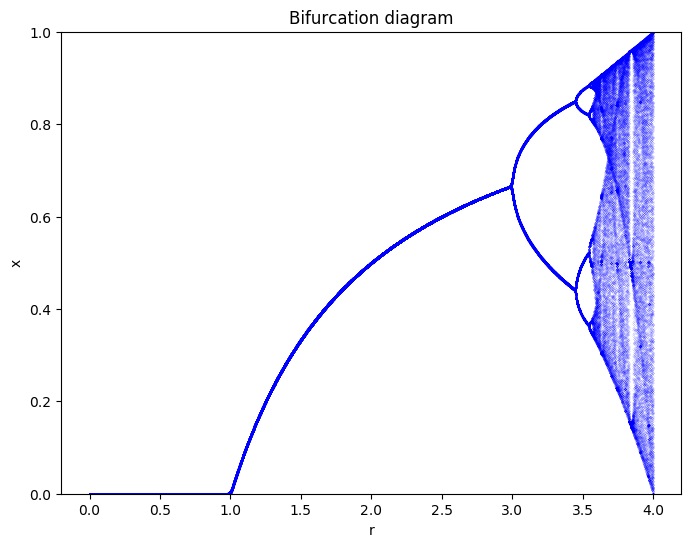

PyObject <matplotlib.text.Text object at 0x7f4484e6fac8>

In [8]:
#Question 4...
#sorry, the code takes a while to produce the graph, but it does work.
using Formatting, PyPlot
df(x,r) = r-2*r*x
f(x,r) = r*x*(1-x)

x0 = 0.5
r1 = 0.0
r2 = 4.0
Nr = 4000
R = linspace(r1,r2,Nr) |> collect
σ = zeros(size(R))

for (index,value) in enumerate(R)
x0 = 0.5
x = zeros(600)

#first generating the 600 iterates of x
function logmap(x0,r,iter)
    x[1] = x0
    for n=2:iter
        x[n] = f(x[n-1],r)
    end
    return x
end

x = logmap(x0,value,600)

#generating lyapunov exponent
function my_lyap(x)
    sigma = sum([log(abs(df(y,value))) for y in x])
    return sigma
end

σ[index] = (1/600)*my_lyap(x[500:599])
end
f1=figure(figsize=(8,6))
plot(R,σ)
xlabel("r")
ylabel("σ")
title("Lyapunov exponent behaviour as r increases")
plot(R,zeros(size(R)))


#now plotting bifurcation
using PyPlot

function logzoom(r1,r2)
    Nr = 4000
    R = linspace(r1,r2,Nr) |> collect
    Nn = 300

    #iterate
    X = zeros(Nr,Nn)
    X[:,1] = .5*ones(Nr)
    for n in 2:Nn, (j,r) in enumerate(R)
        X[j,n] = f(X[j,n-1],r)
    end
    return X
end

Nr = 4000
r1=0.0
r2=4.0
R = linspace(r1,r2,Nr) |> collect
X=logzoom(r1,r2)
Xplot=X[:,end-100:end]
f2=figure(figsize=(8,6))
plot(R,Xplot,"bo",ms=.06)
ylim(0,1)
xlabel("r")
ylabel("x")
title("Bifurcation diagram")

$\com{Note you're off by a factor of 6 as you average over 100 elements, but divide by 600.}$

To implement this, I took the equation from lecture 10 $$\sigma=\lim_{n\to \infty}\frac{1}{n}\left\{\sum_{i=0}^{n-1}\ln\big|f'(x_i)\big|\right\}$$

Where $$f'(x) = r-2rx$$

Whenever the lyapunov exponent ($\sigma$) touches the zero line, the lower diagram bifurcates. This comes from the lyapunov exponent's definition of $$|\delta_n|\approx|\delta_0|e^{n\sigma},$$

Due to its exponential nature, when the lyapunov exponent is positive, initial perturbations diverge exponentially and the motion is chaotic. When it is instead negative, the initial perturbations decay exponentially and the motion is stable.

Plotting a line of $y = 0$ it shows that when $\sigma$ is below 0, this corresponds to the points on the the bifurcation diagram where it is nonchaotic. Everytime the lyapunov exponent touches the zero line, we get a bifurcation. When it goes above the line, it becomes chaotic. We can actually see that past $r = 3.5$ there are a couple of points amidst the chaos where the lyapunov exponent dips below 0 again and the logistic map once again becomes periodic and stable. The really big dip around $r \approx 3.8$ is period 3. These lines are the "islands of stability" that we observed in the question before. We can actually zoom in on the point where it begins period doubling rapidly to get a closer look of how the lyapunov exponent's sign dictates the system's behaviour.

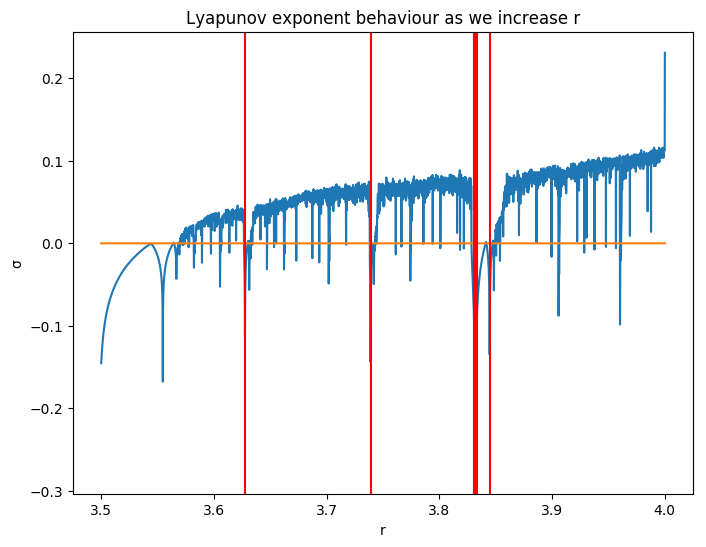

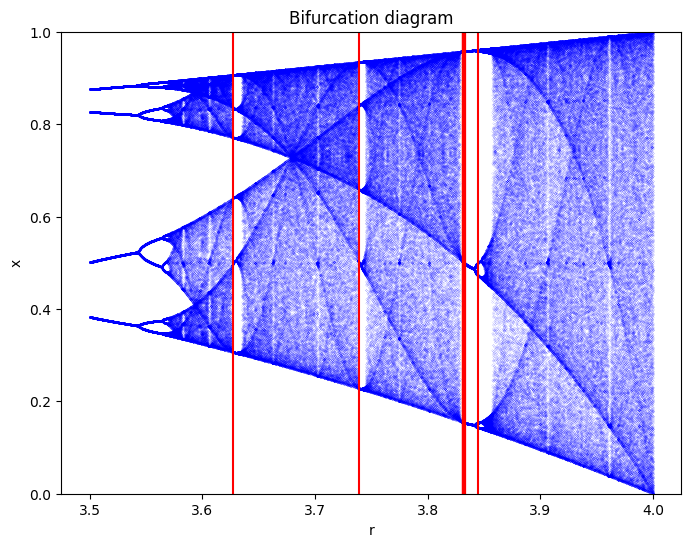

PyObject <matplotlib.text.Text object at 0x7f448114cc88>

In [9]:
#Question 4...
#sorry, the code takes a while to produce the graph, but it does work.
using Formatting, PyPlot
df(x,r) = r-2*r*x
f(x,r) = r*x*(1-x)

x0 = 0.5
r1 = 3.5
r2 = 4.0
Nr = 4000
R = linspace(r1,r2,Nr) |> collect
σ = zeros(size(R))

for (index,value) in enumerate(R)
x0 = 0.5
x = zeros(600)

#first generating the 600 iterates of x
function logmap(x0,r,iter)
    x[1] = x0
    for n=2:iter
        x[n] = f(x[n-1],r)
    end
    return x
end

x = logmap(x0,value,600)

#generating lyapunov exponent
function my_lyap(x)
    sigma = sum([log(abs(df(y,value))) for y in x])
    return sigma
end

σ[index] = (1/600)*my_lyap(x[500:599])
end
f1=figure(figsize=(8,6))
plot(R,σ)
xlabel("r")
ylabel("σ")
title("Lyapunov exponent behaviour as we increase r")
plot(R,zeros(size(R)))

#just finding the very negative sigma, corresponding to islands of stability
sigma_negative = []
for (index,value) in enumerate(σ)
    if value < -0.1 && R[index] > 3.57
        push!(sigma_negative,index)
    end
end

for i in sigma_negative
    axvline(x=R[i],c="r")
end

#now plotting bifurcation
using PyPlot

function logzoom(r1,r2)
    Nr = 4000
    R = linspace(r1,r2,Nr) |> collect
    Nn = 300

    #iterate
    X = zeros(Nr,Nn)
    X[:,1] = .5*ones(Nr)
    for n in 2:Nn, (j,r) in enumerate(R)
        X[j,n] = f(X[j,n-1],r)
    end
    return X
end

Nr = 4000
r1=3.5
r2=4.0
R = linspace(r1,r2,Nr) |> collect
X=logzoom(r1,r2)
Xplot=X[:,end-100:end]
f2=figure(figsize=(8,6))
plot(R,Xplot,"bo",ms=.06)
for i in sigma_negative
    axvline(x=R[i],c="r")
end
ylim(0,1)
xlabel("r")
ylabel("x")
title("Bifurcation diagram")

I have simply plotted red lines where the lyapunov exponent was sufficently negative past r=3.57 (once the system has properly descended into chaos). As we can see from the lines on the graph, the points where the lyapunov exponent are negative line up with the "islands of stability".

$\com{Cool. Good exploration and reasoning 10/10.}$